In [1]:
import os
import scipy
import scipy.io
import numpy as np
from numpy import random

from google.colab import output
from scipy import ndimage, misc ## to scale up the model without exporting
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot
from datetime import date

from PIL import Image

output.clear()

In [ ]:
from google.colab import drive
drive.mount('/content/drive',  force_remount = True)
output.clear()

#Load and prepare the data

###Setup folders 

Useful function to create new folders

In [ ]:
def NewDir(path, name):
  if os.path.isdir ( path + str(name) ) == False:
    os.mkdir( path + str(name) )
  return str(path+'/'+ name +'/')


preparing the folder structure and storing filepaths in variables that we will use later in training.

set root_dir to the main folder that holds your notebooks for this class

set data_dir to the location of your dataset files


training_dir will create a new directory for each training day to ensure you don't override previously saved models  

/content/drive/MyDrive/AIA-IAAC/AIA-GANS-Interior/Dir1train/Dir1

/content/drive/MyDrive/AIA-IAAC/AIA-GANS-Interior/Dir1train/train_1

In [ ]:

root_dir= '/content/drive/MyDrive/AIA-IAAC/AIA-GANS-Interior/Dir1train'
work_dir = NewDir(root_dir,'')
data_dir = NewDir(root_dir,'Datasets') + 'Dir1'
today = date.today()
train_date = str(today)+'_train'
training_dir = NewDir(work_dir, train_date)


/content/drive/MyDrive/AIA-IAAC/AIA-GANS-Interior/Dir1train/Datasets/Dir1

In [ ]:
data_dir

'/content/drive/MyDrive/AIA-IAAC/AIA-GANS-Interior/Dir1train/Datasets/Dir1'

In [ ]:
work_dir

'/content/drive/MyDrive/AIA-IAAC/AIA-GANS-Interior/Dir1train//'

In [ ]:

size = len(work_dir)
work_dir= work_dir[:size - 1]

In [ ]:
work_dir

'/content/drive/MyDrive/AIA-IAAC/AIA-GANS-Interior/Dir1train/'

In [ ]:
train_date 

'2022-06-10_train'

In [ ]:
training_dir

'/content/drive/MyDrive/AIA-IAAC/AIA-GANS-Interior/Dir1train///2022-06-11_train/'

###Load dataset from txt file

Creates a function to read txt files, reshape and add them to a 4dimensional np_array of shape (number of samples, grid width, grid length, grid height)

Function to get all digits in a string and return them joined up as an integer

takes as argument: string to be processed

In [ ]:
def is_digit (name):
  return int(''.join(filter(str.isdigit, name)))

Function to load text files containing your image or 3d data. Use with data generated using the gh script we discussed in class

takes as arguments:

dir = path to the directory containing data

*shape = list of 3 integers representing width, length, height of your data. 

>  
Note that:

> width * lenght *height must equal the lenght of your input txt file

> variable must be passed preceded by *

> for 2d images, formated as a text file, you can use `[width, height, 1]` as shape

name = part of the string to search for in the filenames that is common to all files in your dataset. example "data_eames_001.txt" can search for string "data"








In [ ]:
def LoadDatasetTxt(dir, *shape, name):
  files = os.listdir(dir)
  dataset=[]
  points = []
  data_num = 0
  #files.sort(key=is_digit)
  for file in files[:]:
    data_num +=1
    if str(name) in file:
      data = np.loadtxt(dir + '/'+file)
      print (str(data_num) + 'files loaded' + "-" + file + "done")
      data = data.reshape(shape[0], shape[1], shape[2])

      dataset.append(data)
  return dataset


In case o using labels as well, this function reads all label files from your dataset path and returns the strings into a single list

In [ ]:
def LoadLabelsTxt(dir, name):
  files = os.listdir(dir)
  dataset=[]
  files.sort(key=is_digit)
  for file in files[:]:
    if str(name) in file:
      data = np.loadtxt(dir + '/'+file, dtype=np.str)
      print(data)
      if len(data)>=2:
        data = ' '.join(data)
      print (data)
      print (file + "loaded")
      dataset.append(data)
  return dataset

function to load data from images

In [ ]:
def LoadDatasetImg(dir, name):
  files = os.listdir(dir)
  dataset=[]

  data_num = 0
  files.sort(key=is_digit)
  for file in files[:]:
    data_num +=1
    if str(name) in file:
      img = Image.open( file)
      img.load()
      data = np.asarray( img, dtype="int32" )
      print (str(data_num) + 'files loaded' + "-" + file + "done")
      dataset.append(data)
  return dataset

/content/drive/MyDrive/AIA-IAAC/AIA-GANS-Interior/Dir1train/Dir1

In [ ]:
data_dir

'/content/drive/MyDrive/AIA-IAAC/AIA-GANS-Interior/Dir1train/Datasets/Dir1'

Name that you will give o the dataset storred as .npy file

In [ ]:
npy_x_name = 'Dataset1_3d_It3_64x64x64.npy'
#npy_y_name = 'Dataset2_3d_labels.npy'

Run load dataset from text function with the correct args

In [ ]:
#--->Uncoment next line to skip this cell if loading npy file
#%%script echo skipping


#Note your 3d files should be of size 64 * 64 * 64
shape = [64, 64, 64] # use shape =[20,20,1] for 2d files.

x_data = LoadDatasetTxt(data_dir,*shape, name='Iteration')

output.clear()

x_data = np.array (x_data)
# x_data = np.swapaxes(x_data ,1,3) # Use this line if you created 3d data with the gh script shared, to corectly display objects base as xy plane
print (x_data.shape)


#will save the dataset in the .npy format at the same location as your raw dataset
np.save((data_dir + '/' + npy_x_name), x_data)


(104, 64, 64, 64)


If using labels that are storred in separate files, 

**No Labels used**

In [ ]:
#--->Uncoment next line to skip this cell if loading npy file
#%%script echo skipping

'''y_data = LoadLabelsTxt(data_dir, name='text')

print (len(y_data))
y_data = np.array (y_data)

print (y_data.shape)
np.save((data_dir + '/' + npy_y_name), y_data)'''

###Load dataset from .npy file

Once you have loaded the data from raw .txt files at lease once, you can load from the saved .npy files thereafter

In [ ]:
#Load dataset from .npy file

#--->uncomment next line if loading your data for the first time
#%%script echo skipping

dataset_x = np.load((data_dir + '/' + npy_x_name),allow_pickle=True)
#dataset_y = np.load((data_dir + '/' + npy_y_name),allow_pickle=True)

x_data = dataset_x
#y_data = dataset_y

#print("x_data shape is", dataset_x.shape, "and y_data shape is", dataset_y.shape )
print("x_data shape is", dataset_x.shape )


x_data shape is (104, 64, 64, 64)


In [ ]:
randomize = np.arange(x_data.shape[0])
np.random.shuffle(randomize)

x_rand = x_data[randomize]
#y_rand = y_data[randomize]

##Prepare labels data

**No Labels**

If using labels, this next cellis important so you can pass the 'string' category names to the learning loop as integers
Use depending on the model input and output requirements 

In [ ]:
'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_num = le.fit_transform(y_data)
def get_label_name(y_num, y_data):
  ordered_labels = []
  for i in range(13):
    ind = np.array(np.where(y_num == i))
    id = ind[0]
    l_name = y_data[id][0]
    print( y_data[id][0])
    ordered_labels.append(l_name)
  return ordered_labels
ordered_labels = get_label_name(y_num, y_data)'''

#Visualise the data

##Plot 3d voxels in 2 diferent ways

Show voxel model one by one

Show multiple data samples as 3d scatter plots

takes as arg:
voxels = 1 sample from your dataset. Use dataset[5,:,:,:] to plor sam 

In [ ]:
def ShowVoxelModel(voxels, title, figsize=(20, 20), axisoff=False, edgecolor = 'teal', facecolor='deepskyblue', alpha = 0.5, linewidth = 0.2):
    voxels = voxels
    title = title

    fig = plt.figure(figsize=figsize)

    ax = plt.subplot(projection='3d')
    ax.set_proj_type('ortho')
    ax.voxels(voxels, 
    facecolor=facecolor,
    edgecolor=edgecolor,
    alpha = alpha,
    linewidth =linewidth)
    ax.set_title(title, loc = 'right')
   
    #inverts the axes
    #ax.invert_xaxis()
    #ax.invert_yaxis() 
    ax.invert_zaxis()
    
    if axisoff:
        ax.set_axis_off()


    plt.show()

In [ ]:
#sample_path='/content/drive/MyDrive/AIA-IAAC/AIA-GANS-Interior/Dir1/Dataset2_3d_20x20x20.npy'

sample_path='/content/drive/MyDrive/AIA-IAAC/AIA-GANS-Interior/Dir1train/Dir1'

**Removing y that is the labels from the function**

In [ ]:
def plot_samples(examples, labels, n, name, use_treshold=True, threshold = 0.999, cube_dim=64,
                 show_graph = True, show_title = True, show_axis = False, save_fig=False, save_fig_dir=sample_path,
                 linewidths=0.01, dpi=80, cmap= 'plasma', figsize=(20, 20)):
  global ordered_labels
  print(examples.shape)


  if examples.shape == (cube_dim,cube_dim,cube_dim):
    examples = examples.reshape(1,cube_dim,cube_dim,cube_dim)

  # plot images
  if use_treshold:
    examples = examples.reshape(( examples.shape[0],examples.shape[1],examples.shape[2],examples.shape[3] ))
    examples[examples<threshold] = 0

  
  fig = pyplot.figure(figsize=(20,20)) #fig = pyplot.figure(figsize=figsize, dpi=dpi)  #(figsize=pyplot.figaspect(0.10)) #plot size
  p = int(np.ceil( examples.shape[0]/n))
  for i in range(len(examples)):
    # define subplot
    ax = fig.add_subplot(n, p, 1 + i, projection='3d')
    # turn off axis
    if not show_axis:
      pyplot.axis('off')
    #define x,y,z for the showcase:
    x, y, z = examples[i].nonzero()
    # add title
    #if show_title:
     # y = labels[i] 
      #ax.set_title(str(ordered_labels[y]))
    # pyplot.subplot(111, )
    ax.set_xlim(0, cube_dim)
    ax.set_ylim(0, cube_dim)
    ax.set_zlim(0, cube_dim)
    c_values = examples[i][np.nonzero(examples[i])]
    ax.scatter(x, y, z, zdir ='z', c = -c_values, cmap = cmap,linewidths=linewidths)
    #inverts the axes
    #ax.invert_xaxis()
    #ax.invert_yaxis() 
    ax.invert_zaxis() 
    # ax.scatter(x, y, z, zdir ='z', c = x, cmap = cmap,linewidths=linewidths)
  # fig.colorbar(ax, ax=fig.ravel().tolist())

  if save_fig:
    save_name = save_fig_dir + '/' + name + '.png'
    save_fig_dir_clean = save_fig_dir.rstrip(os.path.basename(os.path.normpath(save_fig_dir)))
    if not os.path.exists(save_fig_dir_clean):
        os.makedirs(save_fig_dir_clean)
    pyplot.savefig(save_name)
    print('Image saved')   

  if show_graph:
    pyplot.show()
  #clear figure not to exceed ram
  if save_fig:
    pyplot.clf()

###Print

ShowVoxelModel(voxels, title, figsize=(20, 20), axisoff=False, edgecolor='teal', facecolor='deepskyblue', alpha=0.5, linewidth=0.2)

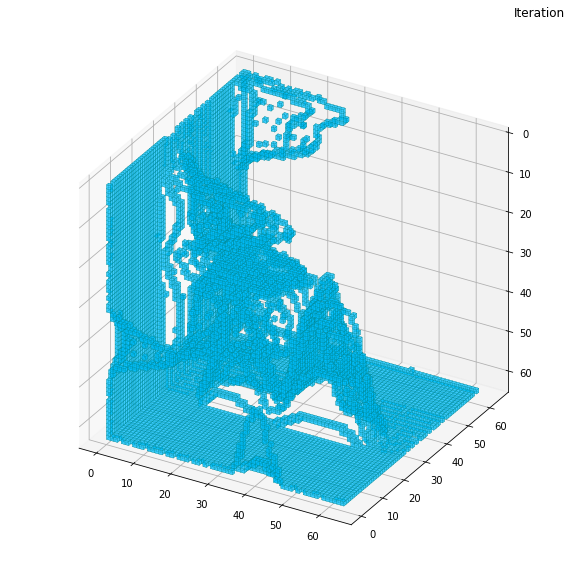

In [ ]:
#%%script echo skipping
print_num = 102

#ShowVoxelModel(x_data[print_num,:,:,:], y_data[print_num])

ShowVoxelModel(x_data[print_num,:,:,:],'Iteration' ,figsize=(10, 10), axisoff=False, edgecolor='teal', facecolor='deepskyblue', alpha=0.5, linewidth=0.2 )

plot_samples(examples, labels, n, name, use_treshold=True, threshold = 0.999, cube_dim=20,
                 show_graph = True, show_title = True, show_axis = False, save_fig=False, save_fig_dir=sample_path,
                 linewidths=0.01, dpi=80, cmap= 'plasma', figsize=(20, 20))

(6, 64, 64, 64)


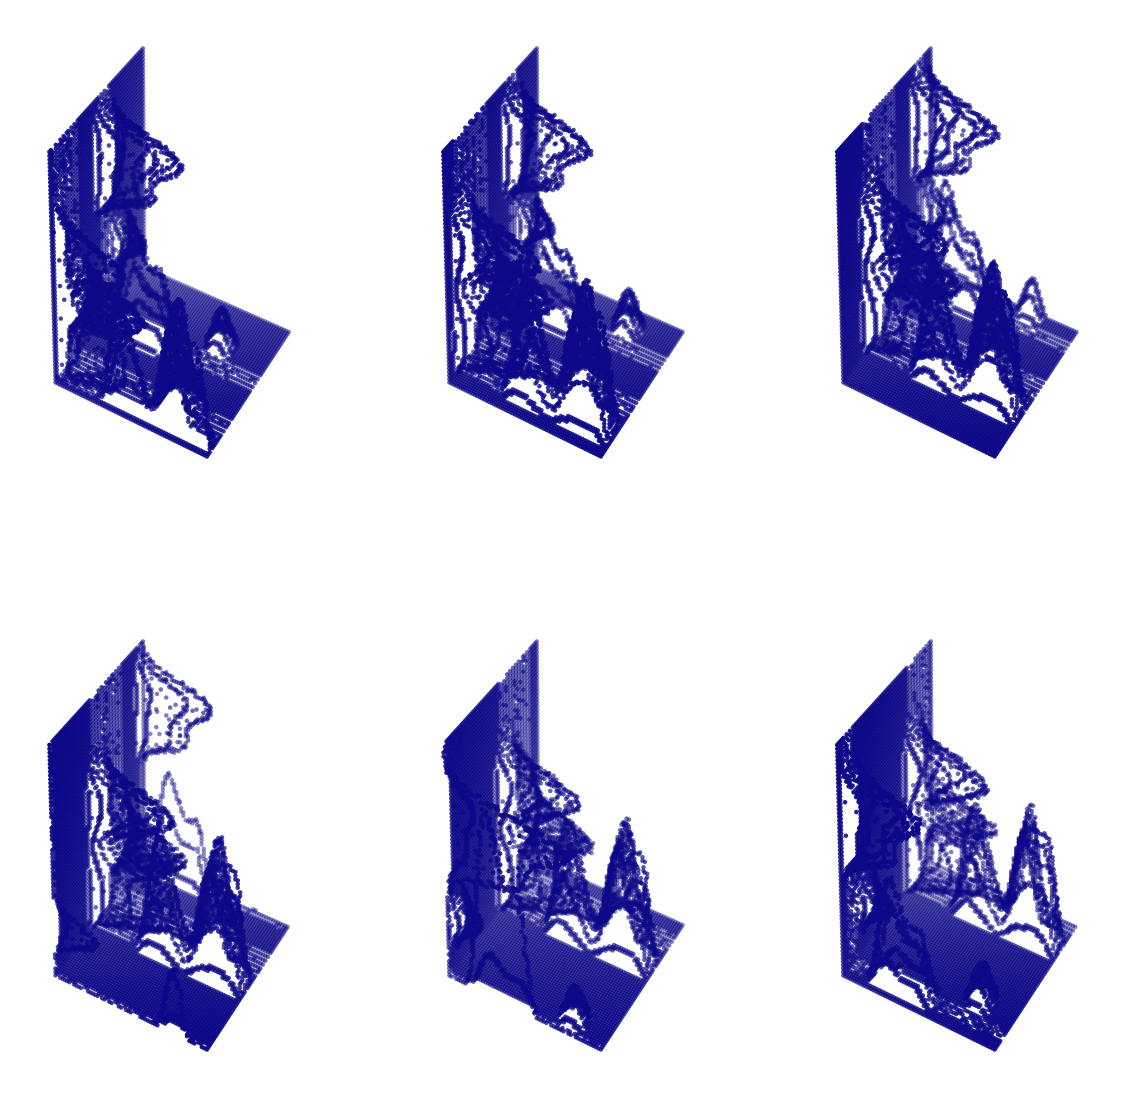

In [ ]:
all_image = x_data[12:18,:,:,:]

plot_samples(all_image, 0, 2,'data',figsize=(10, 10))

(6, 64, 64, 64)


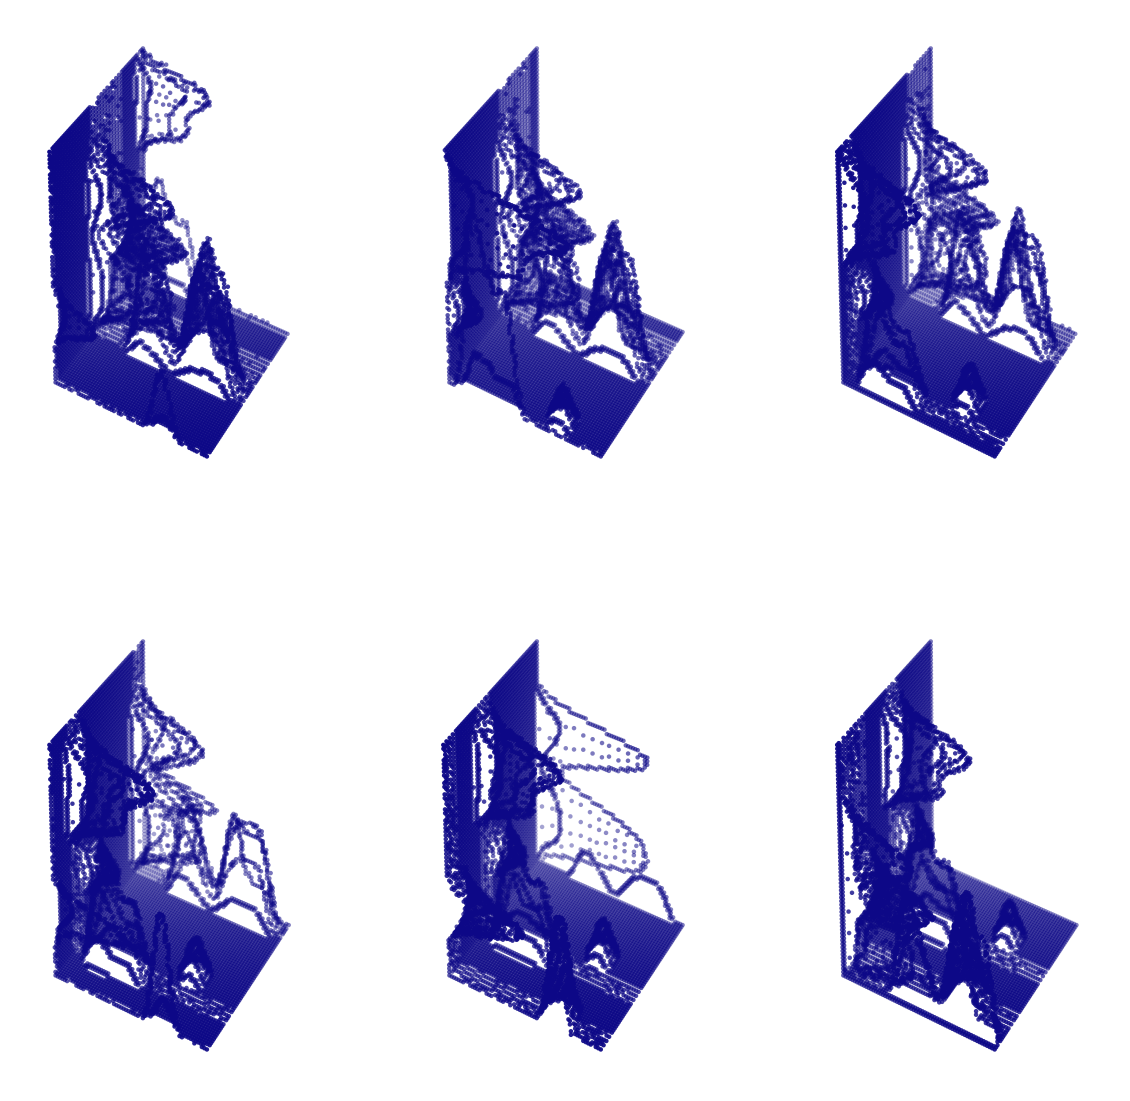

In [ ]:
all_image = x_data[7:13,:,:,:]

plot_samples(all_image, 3, 2,'data')

(6, 64, 64, 64)


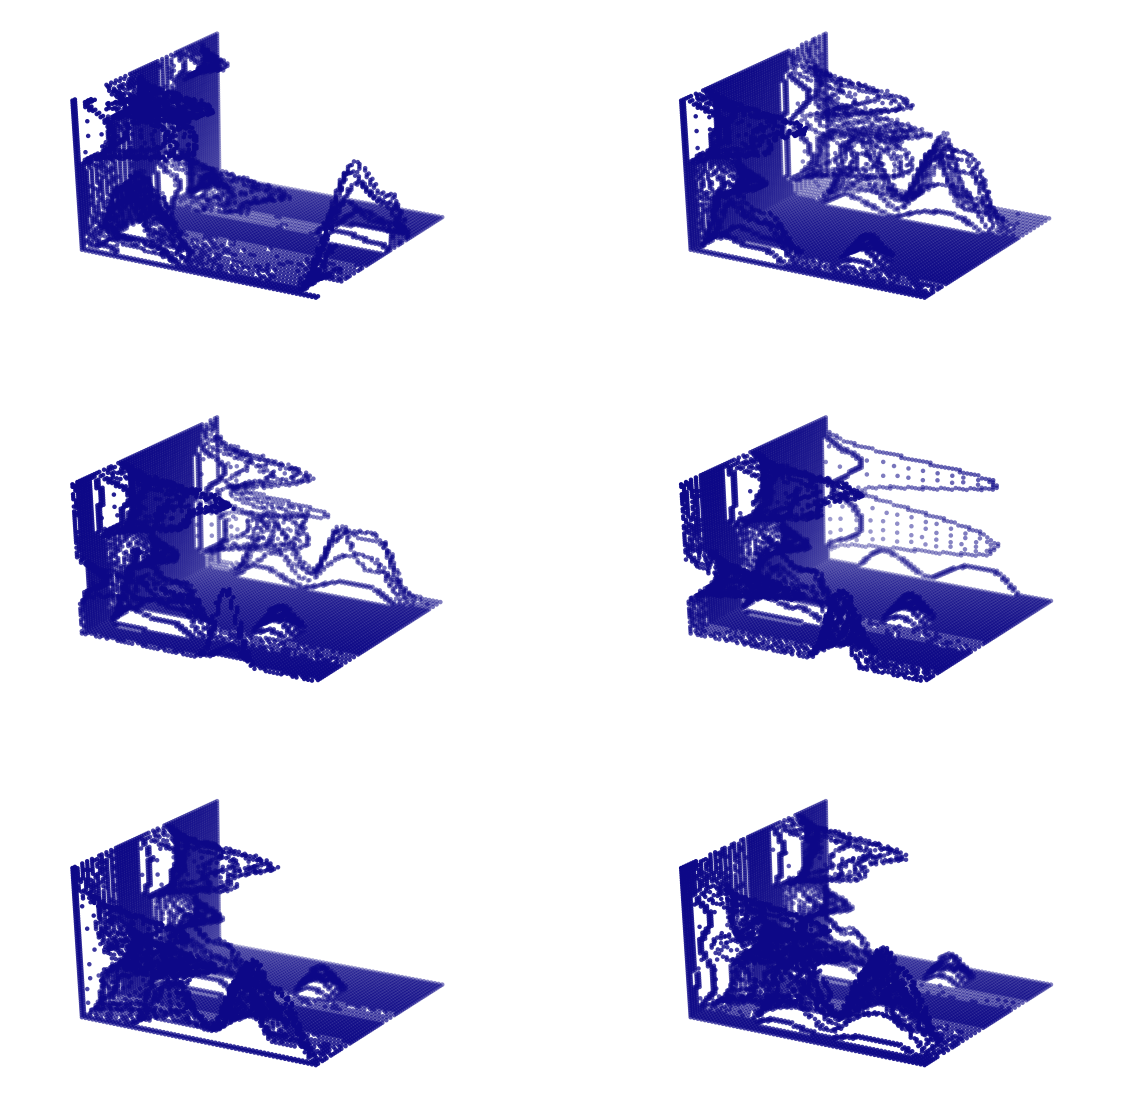

In [ ]:
all_image = x_data[0:6,:,:,:]

plot_samples(all_image, 3, 3,'data')

##Print function to sample a number of images from your 2d dataset

**Using 3D Dataset**

args: 

startnum = the first image to plot

num = how many images to plot in total

im_width = image width

im_height = image height

*im_set = dataset to sample from

In [ ]:
def PrintImgs (startnum, num, im_width, im_height, *im_set):
  plt.figure(figsize=(num*2.5, 2.5))
  for i in range(num):
    j = i+startnum
    ax = plt.subplot( 1, num, i+1 )
    ax.figsize=(50,10)
    plt.imshow (im_set[j].reshape(im_width, im_height))
    plt.gray()
    #plt.title('Original Image '+ str(i))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show

In [ ]:
#PrintImgs(5, 10, shape[0], shape[1], *x_train)